In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### ΑΣΚΗΣΗ 1.
 Μας ενδιαφέρει ο μέσος χρόνος διεκπεραίωσης μιας αίτησης (query) σε μια
βάση δεδομένων. Από τις αιτήσεις μιας ημέρας, επιλέχθηκαν 20 τυχαίες και
μετρήθηκαν οι ακόλουθοι χρόνοι διεκπεραίωσης σε milliseconds:

In [3]:
# Load data sample (milliseconds for a query to be processed)
df = pd.DataFrame(np.array([82, 55, 58, 94, 86, 45, 42, 36, 41, 130, 284, 96, 39, 107, 52, 54, 45, 81, 83, 38]))
df.columns = ['query_time']
degrees_of_freedom = len(df) - 1 # n - 1 = 19
print(df.shape)
df.head()

(20, 1)


,query_time
0,82
1,55
2,58
3,94
4,86


#### a) Τα δεδομένα είναι κατάλληλα για τις μεθόδους συμπερασματολογίας |που γνωρίζουμε;

- Εφόσον οι χρόνοι επιλέγονται τυχαία και ανεξάρτητα, τα δεδομένα φαίνονται κατάλληλα για τις βασικές μεθόδους συμπερασματολογίας.

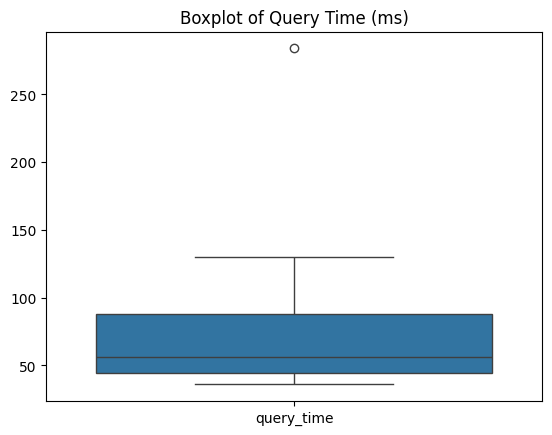

In [4]:
sns.boxplot(data=df)
plt.title('Boxplot of Query Time (ms)')
plt.show()

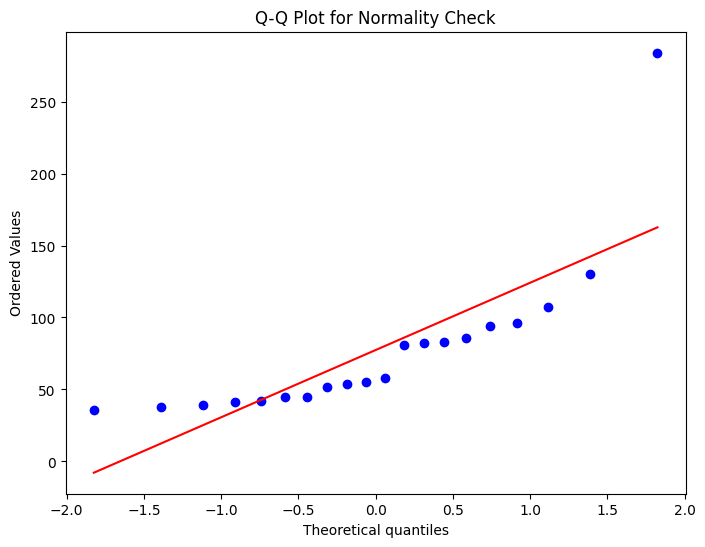

In [9]:
# Creating a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(df['query_time'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Normality Check')
plt.show()

- Παρατηρούμε ότι έχουμε outlier με τιμή query_time = 284 milliseconds.
- Τα δεδομένα μας δεν ακολουθούν ιδιαίτερα την κανονική κατανομή.
- Το δείγμα μας όμως είναι αρκετά μεγάλο (n=20 > 15), ώστε μέθοδοι συμπερασματολογίας που βασίζονται σε κατανομή t να έχουν αρκετά καλή ακρίβεια.

#### b) Δώστε ένα 95% διάστημα εμπιστοσύνης για τη μέση τιμή του χρόνου διεκπεραίωσης

In [10]:
# Sample mean
mean = df.mean()
mean #milliseconds

query_time    77.4
dtype: float64

In [11]:
# Sample standard deviation
std = df.std(ddof=1) #ddof=1 for sample standard deviation
std

query_time    55.524674
dtype: float64

In [12]:
sem = std / np.sqrt(len(df))
sem

query_time    12.415695
dtype: float64

In [13]:
t_score_95 = stats.t.ppf(1.95/2, degrees_of_freedom)
t_score_95

2.093024054408263

In [14]:
margin_of_error = sem * t_score_95
margin_of_error

query_time    25.986348
dtype: float64

In [15]:
confidence_interval = (mean - abs(margin_of_error), mean + abs(margin_of_error) )
confidence_interval

(query_time    51.413652
 dtype: float64,
 query_time    103.386348
 dtype: float64)

In [17]:
confidence_interval_95 = stats.t.interval(confidence=0.95, df=degrees_of_freedom, loc=mean, scale=sem) 
confidence_interval_95[0][0], confidence_interval_95[1][0]

(51.413652441807386, 103.38634755819263)